# Used Cars 

** Import Libraries **

In [56]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

** read the data **

In [57]:
df = pd.read_csv("autos.csv" , encoding='latin-1')


C:\Users\AHMED\AppData\Local\Temp\ipykernel_944\3387208677.py:1: DtypeWarning: Columns (0,5,8,10,13,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("autos.csv" , encoding='latin-1')


** display the data **

In [58]:
df.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,3/24/2016 11:52,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000.0,0,benzin,volkswagen,NaN,3/24/2016 0:00,0.0,70435,4/7/2016 3:16
1,1,3/24/2016 10:58,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000.0,5,diesel,audi,ja,3/24/2016 0:00,0.0,66954,4/7/2016 1:46
2,2,3/14/2016 12:52,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000.0,8,diesel,jeep,NaN,3/14/2016 0:00,0.0,90480,4/5/2016 12:47
3,3,3/17/2016 16:54,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000.0,6,benzin,volkswagen,nein,3/17/2016 0:00,0.0,91074,3/17/2016 17:40
4,4,3/31/2016 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000.0,7,diesel,skoda,nein,3/31/2016 0:00,0.0,60437,4/6/2016 10:17


** what is the information of the data ? **

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371539 entries, 0 to 371538
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   index                371539 non-null  object 
 1   dateCrawled          371539 non-null  object 
 2   name                 371539 non-null  object 
 3   seller               371538 non-null  object 
 4   offerType            371538 non-null  object 
 5   price                371537 non-null  object 
 6   abtest               371538 non-null  object 
 7   vehicleType          333669 non-null  object 
 8   yearOfRegistration   371538 non-null  object 
 9   gearbox              351329 non-null  object 
 10  powerPS              371537 non-null  object 
 11  model                351053 non-null  object 
 12  kilometer            371537 non-null  float64
 13  monthOfRegistration  371537 non-null  object 
 14  fuelType             338151 non-null  object 
 15  brand            

** change the data types of columns if it needs **

In [60]:
df["price"] = pd.to_numeric(df["price"] , errors="coerce")
df["model"] = pd.to_numeric(df["model"] , errors="coerce")
df["postalCode"] = pd.to_numeric(df["postalCode"] , errors="coerce")
df["yearOfRegistration"] = pd.to_numeric(df["yearOfRegistration"] , errors="coerce")
df.dtypes

index                   object
dateCrawled             object
name                    object
seller                  object
offerType               object
price                  float64
abtest                  object
vehicleType             object
yearOfRegistration     float64
gearbox                 object
powerPS                 object
model                  float64
kilometer              float64
monthOfRegistration     object
fuelType                object
brand                   object
notRepairedDamage       object
dateCreated             object
nrOfPictures           float64
postalCode             float64
lastSeen                object
dtype: object

** How many rows and columns in data ? **

In [61]:
df.shape

(371539, 21)

** delete unused row that Dispersed the data **

In [62]:
df = df[df.price > 0]
df = df[df.yearOfRegistration > 1990]
df = df[df.yearOfRegistration <= 2023]
df.fillna(0, inplace = True)
df.shape

(348285, 21)

# Analyze

** How many brand selled in the data ? ** 

In [63]:
df["brand"].value_counts()

volkswagen        73893
bmw               38174
opel              37992
mercedes_benz     32510
audi              31327
ford              24211
renault           17279
peugeot           10733
fiat               9047
seat               6816
skoda              5548
mazda              5467
smart              5174
citroen            4875
nissan             4828
toyota             4537
hyundai            3590
mini               3320
volvo              3096
mitsubishi         2924
honda              2658
kia                2496
sonstige_autos     2322
suzuki             2171
alfa_romeo         2133
porsche            1814
chevrolet          1546
chrysler           1331
dacia               889
daihatsu            762
subaru              733
jeep                720
land_rover          710
jaguar              532
daewoo              532
saab                490
rover               458
lancia              436
lada                178
trabant              33
Name: brand, dtype: int64

** What is the average earning of each seller ? **

In [64]:
df.groupby('seller')["price"].mean()

seller
gewerblich      600.000000
privat        16769.164619
Name: price, dtype: float64

** How many types of offers and how often were these offers used? **

In [65]:
df['offerType'].value_counts()

Angebot    348281
Gesuch          4
Name: offerType, dtype: int64

** what is the name of most expensive car and most Cheaper car? **

In [66]:
 maxim = df.price.max()
df[df['price'] == maxim]['name']    

129969    Kaufe_AUTOS_Zum_basteln
Name: name, dtype: object

In [67]:
 minem = df.price.min()
df[df['price'] == minem]['name']

60        TAUSCHE_BMW_E38_740i_g._SUV_/_GELÄNDEWAGEN_LES...
91        MERCEDES_BENZ_W124_250D_83KW_/_113PS___SCHLACH...
422               Schlachte_Golf_4._89.000_KM._Blau_1.4_16V
1011                   Opel_Omega_B_Caravan_2_0__fahrbereit
1399      VW_Golf_4_IV_Kombi_1_9TDI_101PS_Gruene_Pl._Sch...
                                ...                        
370273    320d_e91_zu_tauschen_gegen_e46_e60_e61_x3_x5_e...
370721              Alles_wird_verkauft!!!!!Auch_als_packet
370821                     Tausche_gegen_Chrysler_van_oder?
370869                            TAUSCHE_BMW_320i_e46_limo
371274              BMW_E34_Touring_530i_mit_12_Monaten_TÜV
Name: name, Length: 1047, dtype: object

** What is the most Vehicle Type selled in data ? **

In [68]:
df['vehicleType'].value_counts()

limousine     89648
kleinwagen    76974
kombi         65554
0             32555
bus           29138
cabrio        21047
coupe         16621
suv           13968
andere         2780
Name: vehicleType, dtype: int64

** How long has this car been running? **

In [69]:
df['timeOfCarWorking'] = 2023 - df['yearOfRegistration']
df.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,timeOfCarWorking
0,0,3/24/2016 11:52,Golf_3_1.6,privat,Angebot,480.0,test,0,1993.0,manuell,...,150000.0,0,benzin,volkswagen,0,3/24/2016 0:00,0.0,70435.0,4/7/2016 3:16,30.0
1,1,3/24/2016 10:58,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011.0,manuell,...,125000.0,5,diesel,audi,ja,3/24/2016 0:00,0.0,66954.0,4/7/2016 1:46,12.0
2,2,3/14/2016 12:52,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800.0,test,suv,2004.0,automatik,...,125000.0,8,diesel,jeep,0,3/14/2016 0:00,0.0,90480.0,4/5/2016 12:47,19.0
3,3,3/17/2016 16:54,GOLF_4_1_4__3TÜRER,privat,Angebot,1500.0,test,kleinwagen,2001.0,manuell,...,150000.0,6,benzin,volkswagen,nein,3/17/2016 0:00,0.0,91074.0,3/17/2016 17:40,22.0
4,4,3/31/2016 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008.0,manuell,...,90000.0,7,diesel,skoda,nein,3/31/2016 0:00,0.0,60437.0,4/6/2016 10:17,15.0


** What is the oldest car ever sold? **

In [70]:
old_car = df['yearOfRegistration'].min()
df[df['yearOfRegistration'] == old_car]

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,timeOfCarWorking
36,36,3/11/2016 11:50,Opel_Kadett_E_CC,privat,Angebot,1600.0,control,andere,1991.0,manuell,...,70000.0,0,0,opel,0,3/11/2016 0:00,0.0,2943.0,4/7/2016 3:46,32.0
118,118,4/4/2016 9:50,Volkswagen_Corrado_1.8_G60,privat,Angebot,3500.0,control,coupe,1991.0,manuell,...,150000.0,5,benzin,volkswagen,nein,4/4/2016 0:00,0.0,66111.0,4/6/2016 11:17,32.0
225,225,3/7/2016 17:52,Volkswagen_Golf_Cabrio,privat,Angebot,2222.0,test,cabrio,1991.0,manuell,...,150000.0,3,benzin,volkswagen,nein,3/7/2016 0:00,0.0,17495.0,4/6/2016 13:17,32.0
335,335,3/5/2016 14:47,Volkswagen_Transporter_T4_70B_1F2,privat,Angebot,650.0,control,kombi,1991.0,manuell,...,150000.0,7,diesel,volkswagen,ja,3/5/2016 0:00,0.0,59348.0,4/7/2016 9:45,32.0
534,534,3/23/2016 13:45,Volkswagen_Golf_2,privat,Angebot,950.0,test,limousine,1991.0,manuell,...,150000.0,6,benzin,volkswagen,nein,3/23/2016 0:00,0.0,94121.0,3/26/2016 6:16,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371170,371159,3/21/2016 13:37,Volkswagen_Golf_Automatik_1_8_CL,privat,Angebot,690.0,test,limousine,1991.0,automatik,...,125000.0,2,benzin,volkswagen,nein,3/21/2016 0:00,0.0,79235.0,3/29/2016 22:15,32.0
371388,371377,3/26/2016 8:37,VW_Polo_86c_Fox,privat,Angebot,200.0,test,kleinwagen,1991.0,manuell,...,150000.0,1,benzin,volkswagen,ja,3/26/2016 0:00,0.0,27798.0,3/29/2016 12:16,32.0
371461,371450,4/3/2016 7:55,E250_Diesel_W124_5_Gang_Anhaengerkupplung,privat,Angebot,1500.0,test,limousine,1991.0,manuell,...,150000.0,10,diesel,mercedes_benz,0,4/3/2016 0:00,0.0,66763.0,4/7/2016 10:44,32.0
371484,371473,3/15/2016 19:57,Subaru_Allrad,privat,Angebot,400.0,control,kombi,1991.0,manuell,...,150000.0,0,benzin,subaru,0,3/15/2016 0:00,0.0,24558.0,3/19/2016 15:49,32.0


** which gearbox preferred to our customer ? **

In [73]:
df['gearbox'].value_counts().head(1)

manuell    259048
Name: gearbox, dtype: int64

** what is the most model we selled ? **

In [85]:
df[df['model'] > 0].value_counts().head(1)

index  dateCrawled     name                                                     seller  offerType  price  abtest  vehicleType  yearOfRegistration  gearbox  powerPS  model  kilometer  monthOfRegistration  fuelType  brand       notRepairedDamage  dateCreated    nrOfPictures  postalCode  lastSeen        timeOfCarWorking
82     4/1/2016 22:39  muss_dringend_weg_!!!_2_mal_Alfa_romeo_156_Zu_Verkaufen  privat  Angebot    250.0  test    kombi        2000.0              manuell  155      156.0  150000.0   0                    benzin    alfa_romeo  ja                 4/1/2016 0:00  0.0           8396.0      4/5/2016 20:18  23.0                1
dtype: int64

# Visualizing Data

** Using Seaborn to compare between fuel type ** 

<AxesSubplot:xlabel='fuelType', ylabel='count'>

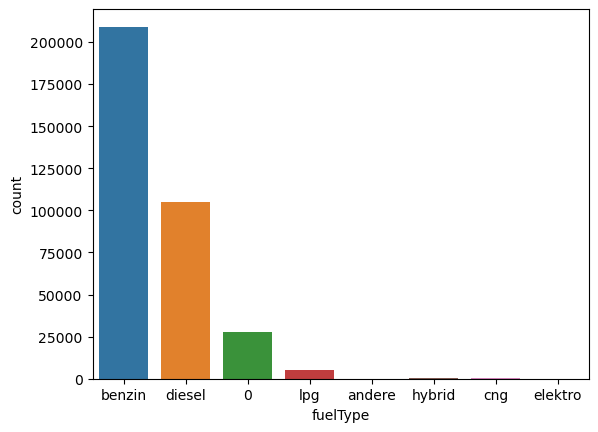

In [86]:
sns.countplot(x='fuelType', data=df)

** Using Seaborn to compare between vehicle type **

<AxesSubplot:xlabel='vehicleType', ylabel='count'>

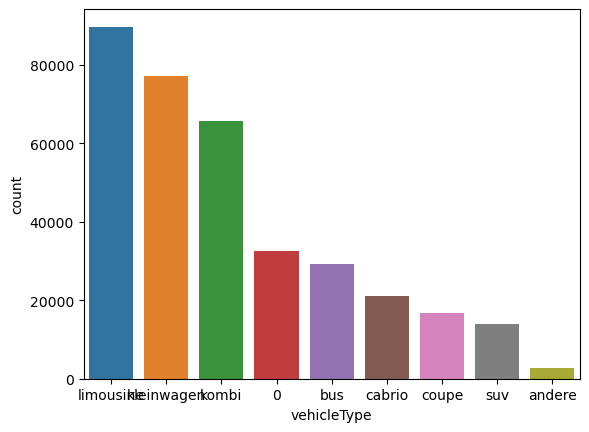

In [87]:
sns.countplot(x='vehicleType', data=df,order=df['vehicleType'].value_counts().index)

** How many cars did each brand sell? using seaborn**

<AxesSubplot:xlabel='brand', ylabel='count'>

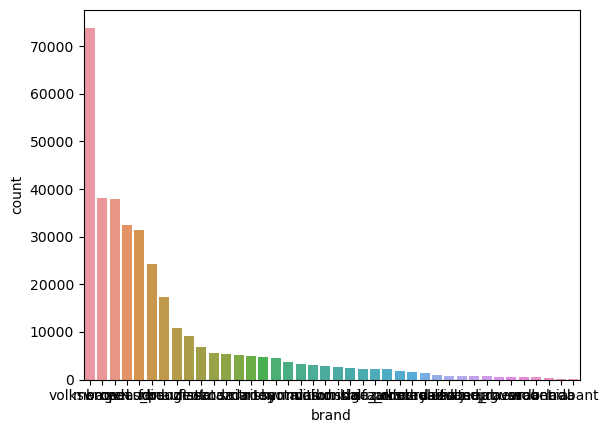

In [88]:
sns.countplot(x='brand', data=df,order=df['brand'].value_counts().index)

** give description to the data ** 

In [89]:
df.describe()

,price,yearOfRegistration,model,kilometer,nrOfPictures,postalCode,timeOfCarWorking
count,3.482850e+05,348285.000000,348285.000000,348285.000000,348285.0,348285.00000,348285.000000
mean,1.676907e+04,2004.231219,5.594022,126286.374664,0.0,51010.98376,18.768781
std,3.689913e+06,6.165185,95.944019,39211.515096,0.0,25705.61169,6.165185
min,1.000000e+00,1991.000000,0.000000,5000.000000,0.0,1067.00000,4.000000
25%,1.250000e+03,2000.000000,0.000000,125000.000000,0.0,30853.00000,15.000000
50%,3.000000e+03,2004.000000,0.000000,150000.000000,0.0,49744.00000,19.000000
75%,7.450000e+03,2008.000000,0.000000,150000.000000,0.0,71638.00000,23.000000
max,2.147484e+09,2019.000000,9000.000000,150000.000000,0.0,99998.00000,32.000000


** what is the information of each brand ? **

In [90]:
df.groupby("brand").describe().transpose()

brand                       alfa_romeo          audi           bmw  \
price              count  2.133000e+03  3.132700e+04  3.817400e+04   
                   mean   3.844113e+04  1.624380e+04  1.515165e+04   
                   std    1.606210e+06  8.000858e+05  7.466937e+05   
                   min    1.000000e+00  1.000000e+00  1.000000e+00   
                   25%    1.000000e+03  2.350000e+03  2.400000e+03   
                   50%    2.250000e+03  6.000000e+03  5.900000e+03   
                   75%    4.950000e+03  1.290000e+04  1.149900e+04   
                   max    7.418530e+07  1.000000e+08  1.000000e+08   
yearOfRegistration count  2.133000e+03  3.132700e+04  3.817400e+04   
                   mean   2.004187e+03  2.004716e+03  2.003865e+03   
                   std    5.059420e+00  6.172792e+00  5.917225e+00   
                   min    1.991000e+03  1.991000e+03  1.991000e+03   
                   25%    2.001000e+03  2.000000e+03  1.999000e+03   
                   50%    2.003000e+03  2.005000e+03  2.004000e+03   
                   75%    2.007000e+03  2.009000e+03  2.008000e+03   
                   max    2.019000e+03  2.019000e+03  2.019000e+03   
model              count  2.133000e+03  3.132700e+04  3.817400e+04   
                   mean   1.013882e+02  4.004852e+00  0.000000e+00   
                   std    7.212818e+01  1.794665e+01  0.000000e+00   
                   min    0.000000e+00  0.000000e+00  0.000000e+00   
                   25%    0.000000e+00  0.000000e+00  0.000000e+00   
                   50%    1.470000e+02  0.000000e+00  0.000000e+00   
                   75%    1.560000e+02  0.000000e+00  0.000000e+00   
                   max    1.590000e+02  2.000000e+02  0.000000e+00   
kilometer          count  2.133000e+03  3.132700e+04  3.817400e+04   
                   mean   1.314721e+05  1.296187e+05  1.330202e+05   
                   std    3.399818e+04  3.854425e+04  3.454426e+04   
                   min    5.000000e+03  5.000000e+03  5.000000e+03   
                   25%    1.250000e+05  1.250000e+05  1.250000e+05   
                   50%    1.500000e+05  1.500000e+05  1.500000e+05   
                   75%    1.500000e+05  1.500000e+05  1.500000e+05   
                   max    1.500000e+05  1.500000e+05  1.500000e+05   
nrOfPictures       count  2.133000e+03  3.132700e+04  3.817400e+04   
                   mean   0.000000e+00  0.000000e+00  0.000000e+00   
                   std    0.000000e+00  0.000000e+00  0.000000e+00   
                   min    0.000000e+00  0.000000e+00  0.000000e+00   
                   25%    0.000000e+00  0.000000e+00  0.000000e+00   
                   50%    0.000000e+00  0.000000e+00  0.000000e+00   
                   75%    0.000000e+00  0.000000e+00  0.000000e+00   
                   max    0.000000e+00  0.000000e+00  0.000000e+00   
postalCode         count  2.133000e+03  3.132700e+04  3.817400e+04   
                   mean   5.516820e+04  5.444432e+04  5.531213e+04   
                   std    2.562809e+04  2.688345e+04  2.557518e+04   
                   min    1.067000e+03  1.067000e+03  1.067000e+03   
                   25%    3.447700e+04  3.254900e+04  3.503750e+04   
                   50%    5.512200e+04  5.445700e+04  5.554300e+04   
                   75%    7.682900e+04  7.865650e+04  7.773100e+04   
                   max    9.997400e+04  9.999800e+04  9.999400e+04   
timeOfCarWorking   count  2.133000e+03  3.132700e+04  3.817400e+04   
                   mean   1.881294e+01  1.828353e+01  1.913538e+01   
                   std    5.059420e+00  6.172792e+00  5.917225e+00   
                   min    4.000000e+00  4.000000e+00  4.000000e+00   
                   25%    1.600000e+01  1.400000e+01  1.500000e+01   
                   50%    2.000000e+01  1.800000e+01  1.900000e+01   
                   75%    2.200000e+01  2.300000e+01  2.400000e+01   
                   max    3.200000e+01  3.200000e+01  3.200000e+01   

brand    

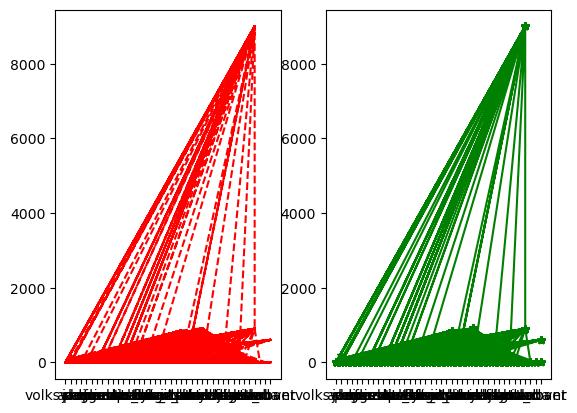

In [91]:
plt.subplot(1,2,1)
plt.plot(df['brand'],df['model'],'r--')
plt.subplot(1,2,2)
plt.plot(df['brand'],df['model'],'g*-')

** Find if the data correlated or not ?**

<AxesSubplot:>

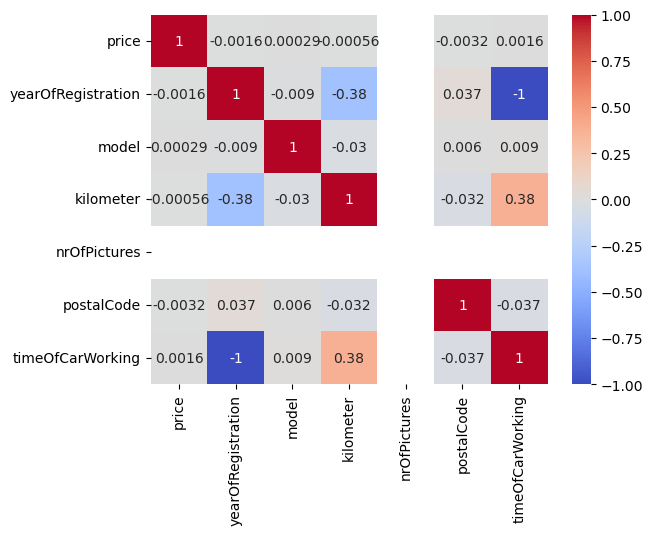

In [92]:
sns.heatmap(df.corr() , cmap = 'coolwarm' , annot = True)

In [94]:
pivo = df.pivot_table(values = 'kilometer' , index = 'model' , columns = 'brand'  )

<AxesSubplot:xlabel='brand', ylabel='model'>

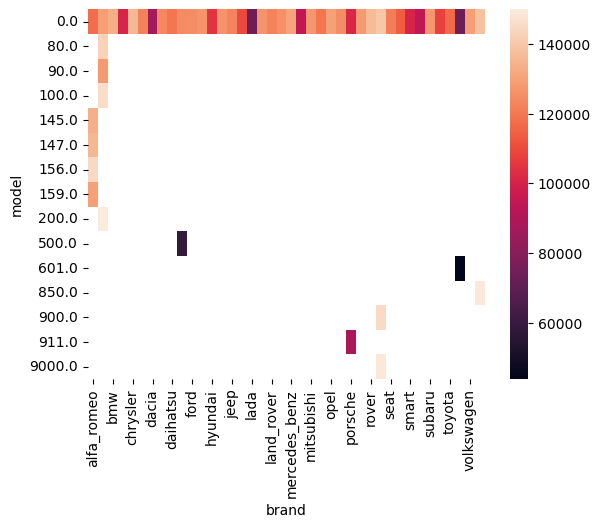

In [95]:
sns.heatmap(pivo)